Example from
https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/transpiler-passes-scheduling

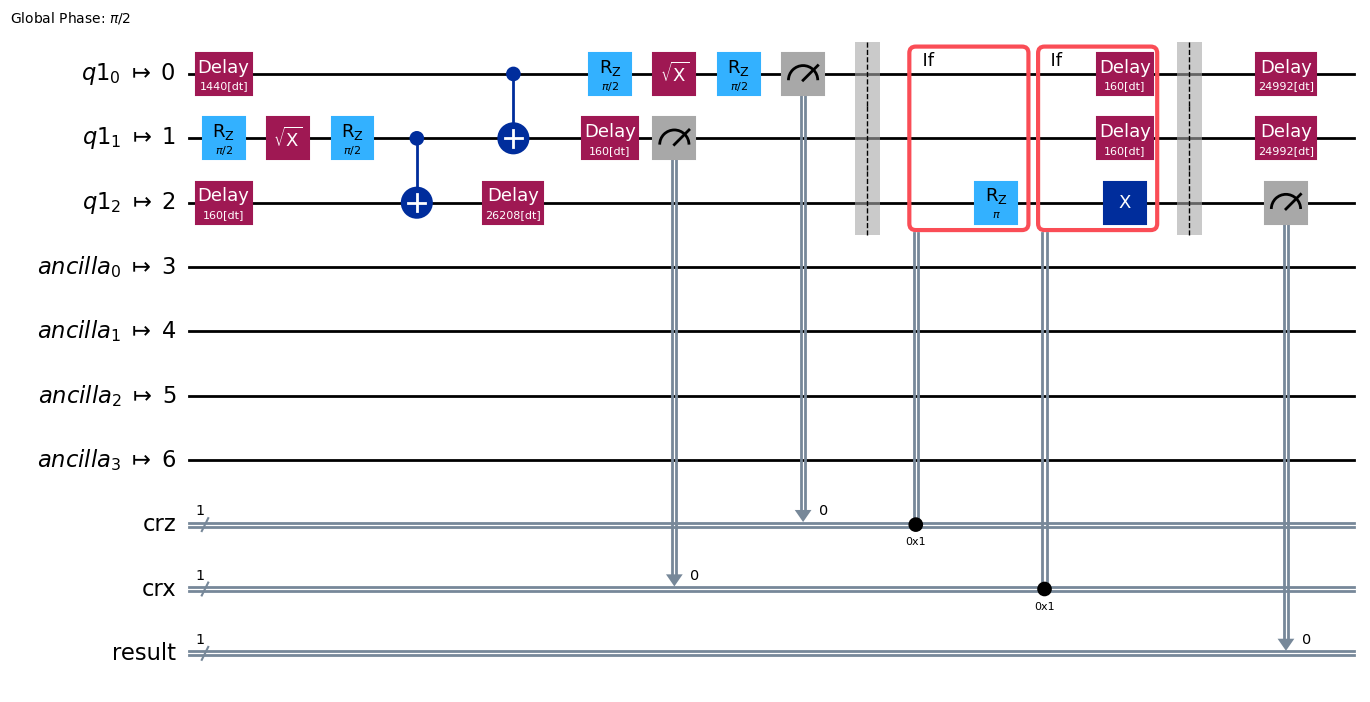

In [3]:
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.passmanager import PassManager
 
from qiskit_ibm_runtime.transpiler.passes.scheduling import DynamicCircuitInstructionDurations
from qiskit_ibm_runtime.transpiler.passes.scheduling import ALAPScheduleAnalysis
from qiskit_ibm_runtime.transpiler.passes.scheduling import PadDelay
from qiskit_ibm_runtime.fake_provider import FakeJakartaV2
 
backend = FakeJakartaV2()
 
# Use this duration class to get appropriate durations for dynamic
# circuit backend scheduling
durations = DynamicCircuitInstructionDurations.from_backend(backend)
# Generate the main Qiskit transpile passes.
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
# Configure the as-late-as-possible scheduling pass
pm.scheduling = PassManager([ALAPScheduleAnalysis(durations), PadDelay(durations)])
 
qr = QuantumRegister(3)
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
result = ClassicalRegister(1, name="result")
 
teleport = QuantumCircuit(qr, crz, crx, result, name="Teleport")
 
teleport.h(qr[1])
teleport.cx(qr[1], qr[2])
teleport.cx(qr[0], qr[1])
teleport.h(qr[0])
teleport.measure(qr[0], crz)
teleport.measure(qr[1], crx)
with teleport.if_test((crz, 1)):
    teleport.z(qr[2])
with teleport.if_test((crx, 1)):
    teleport.x(qr[2])
teleport.measure(qr[2], result)
 
# Transpile.
scheduled_teleport = pm.run(teleport)
 
scheduled_teleport.draw(output="mpl", style="iqp")